In [1]:
#quick look at medium saving

import shdom


In [159]:
#medium
    #scatterer
        #griddata estimators
        #griddata microphysics/
        
#everything should be microphysical estimator with certain griddata fixed.
   
#for an optical scatterer estimator
    #save extinction. - lost information on what the 


scatterer = shdom.MicrophysicalScatterer()
scatterer.load_from_csv('/Users/jesserl2/Documents/Code/pyshdom_dev/synthetic_cloud_fields/jpl_les/rico122x106x39.txt')



In [160]:
data = scatterer.lwc.data

import pywt
print(data.shape)

(122, 106, 39)


In [221]:
x = [3, 7, 1, 3, -2, 6, 4, 6]
coeffs = pywt.swt(x, 'db1', level=3)

In [315]:
#pad to closest power of 2.

#find nearest power of 2 to shape.
padded_shape = []
max_level = []
for dim in data.shape:
    condition=True
    i=0
    while condition:
        if dim < 2**i:
            padded_shape.append(2**i)
            max_level.append(i-1)
            condition=False
            
        i+=1
#pad
differences = [pad - data for pad,data in zip(padded_shape,data.shape)]
padded_data = np.pad(data,[(0,diff) for diff in differences],mode='constant')


coeffs = pywt.swtn(padded_data[:,:,4], 'haar',level=max(max_level))
#what is the interpretation of the coefficients? . . .

In [288]:
coeffs[5]['aaa'].shape

(128, 128, 64)

In [264]:
coeffs = pywt.swtn(padded_data, 'db1',level=max_level[0])

In [317]:
coeffs[0]

{'aa': array([[0.32310828, 0.33436141, 0.33986891, ..., 0.28231594, 0.28987344,
         0.30567031],
        [0.33608813, 0.34734125, 0.35284875, ..., 0.29529578, 0.30285328,
         0.31865016],
        [0.33750016, 0.34875328, 0.35426078, ..., 0.29670781, 0.30426531,
         0.32006219],
        ...,
        [0.31390031, 0.32515344, 0.33066094, ..., 0.27310797, 0.28066547,
         0.29646234],
        [0.31476969, 0.32602281, 0.33153031, ..., 0.27397734, 0.28153484,
         0.29733172],
        [0.31747344, 0.32872656, 0.33423406, ..., 0.27668109, 0.28423859,
         0.30003547]]),
 'ad': array([[-0.31646203, -0.32771516, -0.33287578, ..., -0.27566969,
         -0.28322719, -0.29902406],
        [-0.32944188, -0.340695  , -0.34442969, ..., -0.28864953,
         -0.29620703, -0.31200391],
        [-0.33085391, -0.34173984, -0.34347984, ..., -0.29006156,
         -0.29761906, -0.31341594],
        ...,
        [-0.30725406, -0.31850719, -0.32366781, ..., -0.26646172,
         -0.

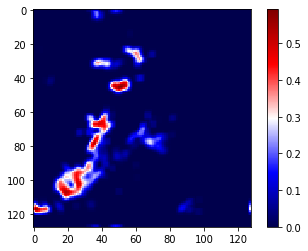

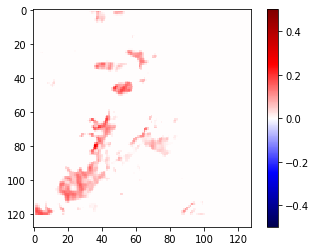

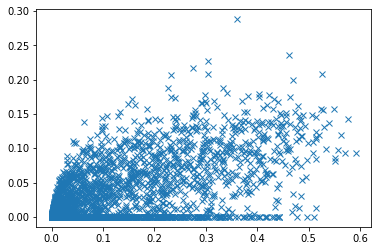

In [344]:
#py.imshow(coeffs[0])
py.figure()
py.imshow(coeffs[4]['aa'],cmap='seismic')
py.colorbar()
py.figure()
py.imshow(padded_data[:,:,4],vmin=-0.5,vmax=0.5,cmap='seismic')
py.colorbar()

py.figure()
py.plot(coeffs[4]['aa'].ravel(),padded_data[:,:,4].ravel(),'x')

In [272]:
help(pywt.swtn)

Help on function swtn in module pywt._swt:

swtn(data, wavelet, level, start_level=0, axes=None)
    n-dimensional stationary wavelet transform.
    
    Parameters
    ----------
    data : array_like
        n-dimensional array with input data.
    wavelet : Wavelet object or name string, or tuple of wavelets
        Wavelet to use.  This can also be a tuple of wavelets to apply per
        axis in ``axes``.
    level : int
        The number of decomposition steps to perform.
    start_level : int, optional
        The level at which the decomposition will start (default: 0)
    axes : sequence of ints, optional
        Axes over which to compute the SWT. A value of ``None`` (the
        default) selects all axes. Axes may not be repeated.
    
    Returns
    -------
    [{coeffs_level_n}, ..., {coeffs_level_1}]: list of dict
        Results for each level are arranged in a dictionary, where the key
        specifies the transform type on each dimension and value is a
        n-dim

In [31]:
import scipy.signal as ss
import numpy as np
widths = np.arange(1,32)
cwtmatr = ss.cwt(data[16,:,15],ss.ricker, widths)

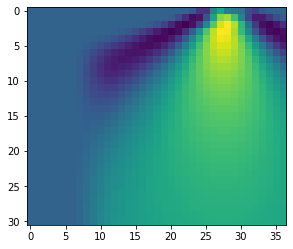

In [32]:
import pylab as py
py.figure()
py.imshow(cwtmatr)

In [143]:
coeffs = pywt.swtn(np.pad(data, 'haar',level=-1)

In [144]:
coeffs_approx = []
coeffs_approx.append((np.zeros(data[16,:-1,15].shape), np.zeros(data[16,:-1,15].shape)))
coeffs_approx.append(coeffs[1])

coeffs_approx2 = []
coeffs_approx2.append(coeffs[0])
coeffs_approx2.append((np.zeros(data[16,:-1,15].shape), np.zeros(data[16,:-1,15].shape)))

IndexError: list index out of range

In [145]:
a = pywt.iswt(coeffs_approx2,wavelet='haar')

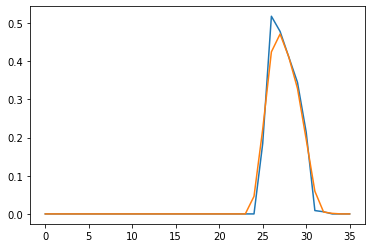

In [140]:
py.plot(data[16,:-1,15])
py.plot(a)

In [148]:
data.shape

(32, 37, 26)

In [89]:
help(pywt.iswt)

Help on function iswt in module pywt._swt:

iswt(coeffs, wavelet)
    Multilevel 1D inverse discrete stationary wavelet transform.
    
    Parameters
    ----------
    coeffs : array_like
        Coefficients list of tuples::
    
            [(cAn, cDn), ..., (cA2, cD2), (cA1, cD1)]
    
        where cA is approximation, cD is details.  Index 1 corresponds to
        ``start_level`` from ``pywt.swt``.
    wavelet : Wavelet object or name string
        Wavelet to use
    
    Returns
    -------
    1D array of reconstructed data.
    
    Examples
    --------
    >>> import pywt
    >>> coeffs = pywt.swt([1,2,3,4,5,6,7,8], 'db2', level=2)
    >>> pywt.iswt(coeffs, 'db2')
    array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

